# Step 1: Begin importing data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will focus on the daily activity dataset for high-level consumer trends.
file_path = '/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'
daily_activity = pd.read_csv(file_path)

print("Data successfully imported.\n")

Data successfully imported.



# Step 2: Explore data, gathering some summary statistics

In [3]:
print("--- Dataset Information ---")
daily_activity.info()

print("\n--- Summary Statistics ---")
# describe() provides the count, mean, standard deviation, min, and max values
display(daily_activity.describe())

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-nul

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


# Step 3: Clean and transform data to prepare for analysis

In [4]:
print("\n--- Cleaning and Transforming Data ---")

# Standardize column names to lowercase for easier querying later if exported to SQL
daily_activity.columns = daily_activity.columns.str.lower()

# Convert 'activitydate' from string to datetime format
daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])

# Feature Engineering: Create a 'day_of_week' column. 
# Identifying trends based on the day of the week is highly valuable for marketing campaigns.
daily_activity['day_of_week'] = daily_activity['activitydate'].dt.day_name()

# Check for and drop duplicate rows
duplicates = daily_activity.duplicated().sum()
print(f"Duplicates found and removed: {duplicates}")
daily_activity = daily_activity.drop_duplicates()

# Check for missing (null) values
null_values = daily_activity.isnull().sum().sum()
print(f"Total null values found: {null_values}")


--- Cleaning and Transforming Data ---
Duplicates found and removed: 0
Total null values found: 0


# Step 4: Conduct descriptive analysis


--- Descriptive Analysis: Daily Averages ---


,avg_steps,avg_calories,avg_sedentary_mins
day_of_week,,,
Monday,7118.588235,2252.867647,1032.852941
Tuesday,4914.917808,1742.424658,850.246575
Wednesday,7510.708333,2377.458333,1011.062500
Thursday,6847.083333,2297.812500,1055.062500
Friday,6737.561644,2313.547945,1054.712329
Saturday,7089.773333,2277.586667,976.626667
Sunday,6058.013889,2167.597222,1015.652778


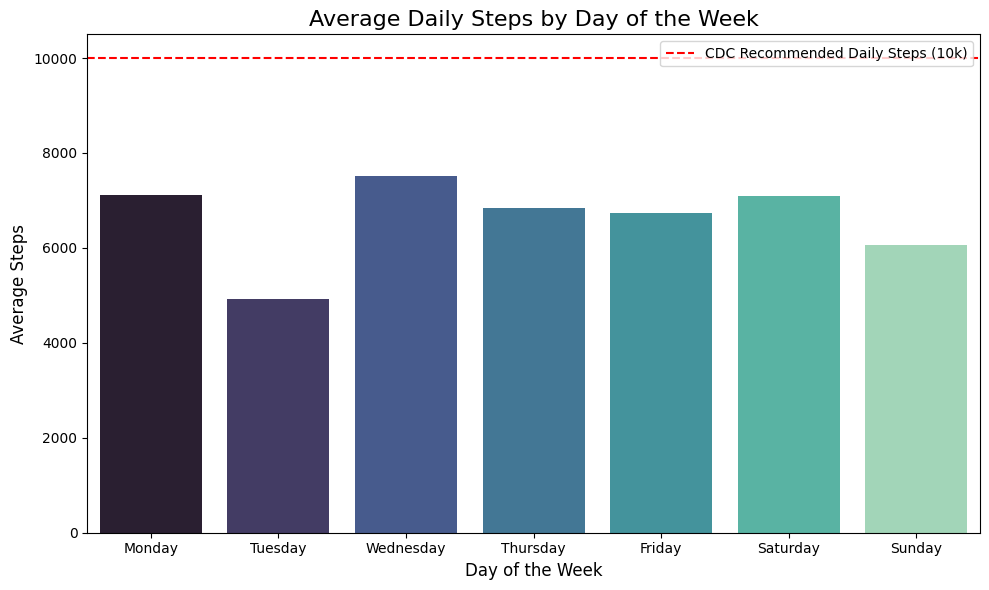

In [5]:
# ==========================================
print("\n--- Descriptive Analysis: Daily Averages ---")

# Group data by day of the week to analyze average user habits
daily_summary = daily_activity.groupby('day_of_week').agg(
    avg_steps=('totalsteps', 'mean'),
    avg_calories=('calories', 'mean'),
    avg_sedentary_mins=('sedentaryminutes', 'mean')
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

display(daily_summary)

# Generate a quick visualization of the findings to share with stakeholders
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_summary.index, y='avg_steps', data=daily_summary, hue=daily_summary.index, palette='mako')
plt.title('Average Daily Steps by Day of the Week', fontsize=16)
plt.ylabel('Average Steps', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.axhline(y=10000, color='r', linestyle='--', label='CDC Recommended Daily Steps (10k)')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Save the figure as a PNG file
plt.savefig("Average Daily Steps by Day of the Week.png",
            dpi=150,
            bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

# Step 5: Export a summary file for further analysis

In [7]:
# Exporting the aggregated summary table to the Kaggle working directory
output_path = '/kaggle/working/daily_activity_summary.csv'
daily_summary.to_csv(output_path)

print(f"\nSummary file exported successfully to: {output_path}")
print("You can download this CSV from the Kaggle 'Output' section for use in Tableau or presentations.")


Summary file exported successfully to: /kaggle/working/daily_activity_summary.csv
You can download this CSV from the Kaggle 'Output' section for use in Tableau or presentations.


---